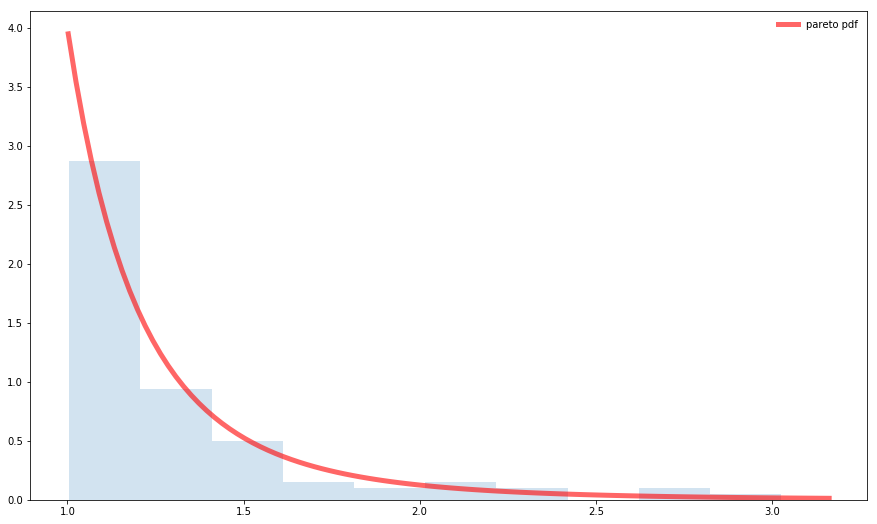

In [27]:
import numpy as np
from scipy.stats import pareto
import matplotlib.pyplot as plt
alpha=4
r = pareto.rvs(alpha, size=100)
fig, ax = plt.subplots(1, 1)

x = np.linspace(pareto.ppf(0.01, alpha),
                pareto.ppf(0.99, alpha), 100)
ax.plot(x, pareto.pdf(x, alpha),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()